In [3]:
#Simple linear Regression using Closed Form Approach .
##Here we have used sqft_living as input and price as output and found the optimized value of coefficients.
###At the end we have found the RSS using sqft_living and bedrooms seperately and found that sqft_living is more relevant to find the price of house as its RSS is low.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('kc_house_train_data.csv')
df_test=pd.read_csv('kc_house_test_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.738400e+04,1.738400e+04,17384.000000,17384.000000,17384.000000,1.738400e+04,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000
mean,4.574349e+09,5.393666e+05,3.369363,2.115048,2080.029510,1.509191e+04,1.494248,0.007651,0.236079,3.410780,7.655028,1787.844512,292.184998,1971.152727,83.107973,98077.936896,47.559313,-122.213281,1985.994995,12776.380867
std,2.872356e+09,3.696912e+05,0.906468,0.771783,921.630888,4.145927e+04,0.539443,0.087136,0.768008,0.649792,1.169818,827.107595,444.404136,29.328722,398.692283,53.525617,0.138703,0.140906,686.512835,27175.730523
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.124087e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.049500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.468650,-122.328000,1490.000000,5100.000000
50%,3.892800e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.000000,2.500000,2550.000000,1.066525e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677625,-122.125000,2360.000000,10065.250000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
id               17384 non-null int64
date             17384 non-null object
price            17384 non-null float64
bedrooms         17384 non-null int64
bathrooms        17384 non-null float64
sqft_living      17384 non-null int64
sqft_lot         17384 non-null int64
floors           17384 non-null float64
waterfront       17384 non-null int64
view             17384 non-null int64
condition        17384 non-null int64
grade            17384 non-null int64
sqft_above       17384 non-null int64
sqft_basement    17384 non-null int64
yr_built         17384 non-null int64
yr_renovated     17384 non-null int64
zipcode          17384 non-null int64
lat              17384 non-null float64
long             17384 non-null float64
sqft_living15    17384 non-null int64
sqft_lot15       17384 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [10]:
import matplotlib.pyplot as plt

In [11]:
x=df['sqft_living']
y=df['price']

In [12]:
#Define function to find optimum coefficients using closed form approach

In [13]:
def linear_regression(x,y):
    n=np.size(x)
    m_x,m_y=np.mean(x),np.mean(y)
    ss_xy=np.sum(x*y)-n*m_x*m_y
    ss_xx=np.sum(x*x)-n*m_x*m_x
    w1=ss_xy/ss_xx
    w0=m_y-w1*m_x
    return(w0,w1)

In [14]:
def reg_line(x,y,b):
    plt.scatter(x,y,color='m',marker='o',s=30)
    y_pred=b[0]+b[1]*x
    plt.plot(x,y_pred,color='g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [15]:
b=linear_regression(x,y)

In [16]:
print(b)

(-47116.07907289418, 281.9588396303426)


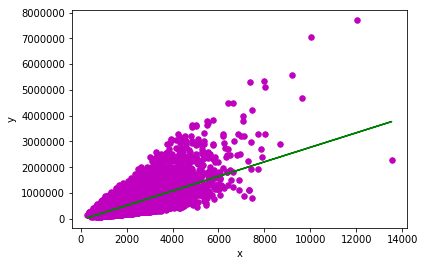

In [17]:
reg_line(x,y,b)

In [18]:
#Function to predict output from Linear regression using optimum coefficients

In [19]:
def predict_linear_reg(x,b):
    y_pred=b[0]+b[1]*x
    return y_pred

In [20]:
y_2650=predict_linear_reg(2650,b)
print(y_2650)

700074.8459475137


In [21]:

def get_residual_sum_of_squares(x,y,b):
     y_pred=b[0]+b[1]*x
     rss=(y-y_pred)**2
     return np.sum(rss)
     

In [22]:
ERROR=get_residual_sum_of_squares(x,y,b)
print(ERROR)

1201918354177283.0


In [23]:
def inverse_regression_predictions(y,b):
    x_pred=(y-b[0])/b[1]
    return x_pred

In [24]:
x_800000=inverse_regression_predictions(800000,b)

In [25]:
print(x_800000)

3004.3962451522766


In [26]:
z=df['bedrooms']

In [27]:
def linear_regression_b(z,y):
    n=np.size(z)
    m_z,m_y=np.mean(z),np.mean(y)
    ss_zy=np.sum(z*y)-n*m_z*m_y
    ss_zz=np.sum(z*z)-n*m_z*m_z
    w_1=ss_zy/ss_zz
    w_0=m_y-w_1*m_z
    return(w_0,w_1)

In [28]:
lr2=linear_regression_b(z,y)
print(lr2)

(109473.1776229578, 127588.95293398836)


In [29]:
test_data=pd.read_csv('kc_house_train_data.csv')
x=test_data['sqft_living']
z=test_data['bedrooms']
y=test_data['price']


In [30]:
error1=get_residual_sum_of_squares(x,y,b)
print(error1)

1201918354177283.0


In [31]:
error2=get_residual_sum_of_squares(z,y,lr2)
print(error2)

2143244498161979.0


In [32]:
#Multiple Regression using Scikit library.
#Adding more related features in the datframe.

In [33]:
df['bedrooms_squared'] = df['bedrooms']*df['bedrooms']
df['bed_bath_rooms'] = df['bedrooms']* df['bathrooms']
df['log_sqft_living'] = np.log(df['sqft_living'])
df['lat_plus_long'] = df['lat'] + df['long']

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,9,3.00,7.073270,-74.7458
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,9,6.75,7.851661,-74.5980
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,4,2.00,6.646391,-74.4951
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,16,12.00,7.580700,-74.8722
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,9,6.00,7.426549,-74.4282


In [35]:
df_test['bedrooms_squared'] = df_test['bedrooms']*df_test['bedrooms']
df_test['bed_bath_rooms'] = df_test['bedrooms']* df_test['bathrooms']
df_test['log_sqft_living'] = np.log(df_test['sqft_living'])
df_test['lat_plus_long'] = df_test['lat'] + df_test['long']

In [36]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,...,0,98028,47.7558,-122.229,1780,12697,9,3.0,7.265430,-74.4732
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,...,0,98126,47.5714,-122.375,2140,4000,16,12.0,7.989560,-74.8036
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,...,0,98002,47.3048,-122.218,1030,4705,9,6.0,7.444249,-74.9132
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,...,0,98027,47.5391,-122.070,2580,3980,9,7.5,7.749322,-74.5309
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,...,0,98117,47.6889,-122.375,1570,5080,9,3.0,6.993933,-74.6861


In [37]:
df_test.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
count,4.229000e+03,4.229000e+03,4229.000000,4229.000000,4229.000000,4.229000e+03,4229.000000,4229.000000,4229.000000,4229.000000,...,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000
mean,4.604771e+09,5.430540e+05,3.376921,2.113561,2079.366280,1.516886e+04,1.494561,0.007094,0.227004,3.403878,...,89.722629,98077.951762,47.563092,-122.216426,1988.844171,12735.877749,12.446678,7.503902,7.550275,-74.653334
std,2.894017e+09,3.564212e+05,1.021434,0.763560,905.317454,4.126563e+04,0.542292,0.083936,0.759375,0.654686,...,413.736867,53.426623,0.137965,0.140497,680.837632,27829.200218,17.868973,4.227032,0.426554,0.182162
min,1.000102e+06,8.500000e+04,0.000000,0.000000,370.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.514000,700.000000,660.000000,0.000000,0.000000,5.913503,-75.177200
25%,2.110900e+09,3.250000e+05,3.000000,1.750000,1430.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,98032.000000,47.476600,-122.330000,1490.000000,5105.000000,9.000000,4.500000,7.265430,-74.767200
50%,4.019301e+09,4.530000e+05,3.000000,2.250000,1920.000000,7.633000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,98065.000000,47.573400,-122.239000,1840.000000,7611.000000,9.000000,7.000000,7.560080,-74.667100
75%,7.338220e+09,6.500000e+05,4.000000,2.500000,2550.000000,1.076000e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,98118.000000,47.679500,-122.125000,2370.000000,10159.000000,16.000000,10.000000,7.843849,-74.528100
max,9.895000e+09,6.885000e+06,33.000000,7.750000,9890.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,5030.000000,858132.000000,1089.000000,57.750000,9.199279,-73.602000


In [38]:
features_1=df[['sqft_living','bedrooms','bathrooms','lat','long']]


In [39]:
features_1.head()

,sqft_living,bedrooms,bathrooms,lat,long
0,1180,3,1.00,47.5112,-122.257
1,2570,3,2.25,47.7210,-122.319
2,770,2,1.00,47.7379,-122.233
3,1960,4,3.00,47.5208,-122.393
4,1680,3,2.00,47.6168,-122.045


In [40]:

from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()
x1,y1=features_1,df[['price']]


In [42]:
model1=lr.fit(x1,y1)

In [43]:
model1.coef_

array([[ 3.12258646e+02, -5.95865332e+04,  1.57067421e+04,
         6.58619264e+05, -3.09374351e+05]])

In [44]:
model1.intercept_

array([-69075726.79256974])

In [45]:
x1_test=df_test[['sqft_living','bedrooms','bathrooms','lat','long']]
y1_test=df_test[['price']]
y_pred1=model1.predict(x1_test)


In [46]:
rss1=(y1_test-y_pred1)**2
RSS1=np.sum(rss1)

In [47]:
features_2=df[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']]
features_3=df[['sqft_living','bedrooms','bathrooms','lat','long','bedrooms_squared','log_sqft_living','lat_plus_long']]
features_2.head()

,sqft_living,bedrooms,bathrooms,lat,long,bed_bath_rooms
0,1180,3,1.00,47.5112,-122.257,3.00
1,2570,3,2.25,47.7210,-122.319,6.75
2,770,2,1.00,47.7379,-122.233,2.00
3,1960,4,3.00,47.5208,-122.393,12.00
4,1680,3,2.00,47.6168,-122.045,6.00


In [48]:
x2,y2=features_2,df[['price']]
model2=lr.fit(x2,y2)

In [49]:
model2.intercept_


array([-66867968.87107883])

In [50]:
model2.coef_

array([[ 3.06610053e+02, -1.13446368e+05, -7.14613083e+04,
         6.54844630e+05, -2.94298969e+05,  2.55796520e+04]])

In [51]:
x2_test,y2_test=df_test[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']],df_test[['price']]
y_pred2=model2.predict(x2_test)
rss2=(y2_test-y_pred2)**2
RSS2=np.sum(rss2)

In [52]:
x3,y3=features_3,df[['price']]
model3=lr.fit(x3,y3)

In [53]:
model3.intercept_

array([-62163239.93554688])

In [54]:
model3.coef_

array([[ 5.17895745e+02,  3.47434918e+04,  3.64681376e+04,
         5.34373572e+05, -4.06758960e+05, -9.44734086e+03,
        -5.36751710e+05,  1.27614612e+05]])

In [58]:

x3_test,y3_test=df_test[['sqft_living','bedrooms','bathrooms','lat','long','bedrooms_squared','log_sqft_living','lat_plus_long']],df_test[['price']]
y_pred3=model3.predict(x3_test)
rss3=(y3_test-y_pred3)**2
RSS3=np.sum(rss3)

In [63]:
print(RSS1 ,
      RSS2  ,
      RSS3)

price    2.255005e+14
dtype: float64 price    2.233775e+14
dtype: float64 price    2.979355e+14
dtype: float64


In [ ]:
features_t1=df_test[['sqft_living','bedrooms','bathrooms','lat','long']]
features_t2=df_test[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']]
features_t3=df_test[['sqft_living','bedrooms','bathrooms','lat','long','bedrooms_squared','log_sqft_living','lat_plus_long']]

In [ ]:
x_t1=features_t1
yt1_predict=model1.predict(x_t1)

In [ ]:
rss_t1=(df_test[['price']]-yt1_predict)**2
np.sum(rss_t1)

In [ ]:
x_t2=features_t2
yt2_predict=model2.predict(x_t2)



In [ ]:
rss_t2=(df_test[['price']]-yt2_predict)**2
np.sum(rss_t2)

In [ ]:
x_t3=features_t3
yt3_predict=model3.predict(x_t3)
rss_t3=(df_test[['price']]-yt3_predict)**2
np.sum(rss_t3)
